# EDA

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

file_path = 'train.csv'
df = pd.read_csv(file_path)

print(df.info())

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             9912 non-null   object
 1   Subject Focus  9912 non-null   int64 
 2   Eyes           9912 non-null   int64 
 3   Face           9912 non-null   int64 
 4   Near           9912 non-null   int64 
 5   Action         9912 non-null   int64 
 6   Accessory      9912 non-null   int64 
 7   Group          9912 non-null   int64 
 8   Collage        9912 non-null   int64 
 9   Human          9912 non-null   int64 
 10  Occlusion      9912 non-null   int64 
 11  Info           9912 non-null   int64 
 12  Blur           9912 non-null   int64 
 13  Pawpularity    9912 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB
None
Series([], dtype: int64)


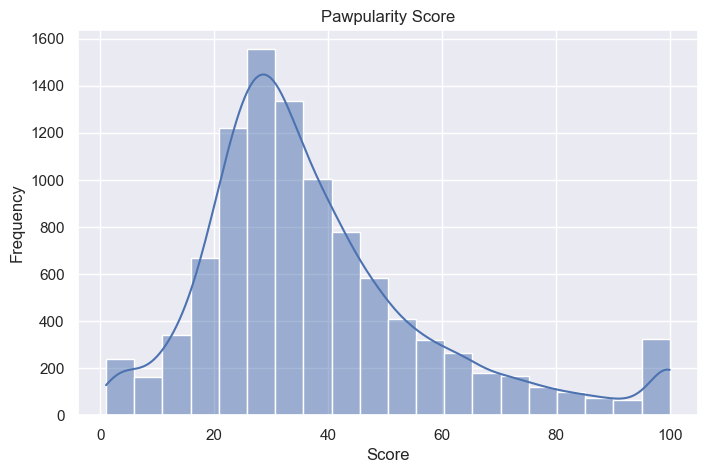

In [11]:
target_column = 'Pawpularity'
if target_column in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[target_column], bins=20, kde=True)
    plt.title('Pawpularity Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()
else:
    print('No Target Variables')

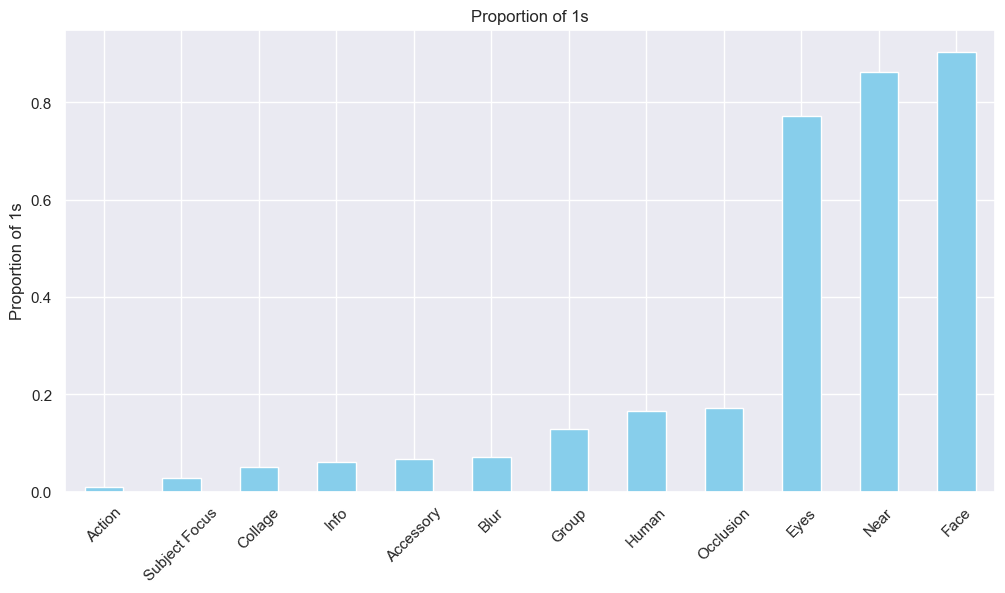

In [13]:
binary_columns = [col for col in df.columns 
                  if df[col].nunique() == 2 and col != target_column]
plt.figure(figsize=(12,6))
df[binary_columns].mean().sort_values().plot(kind='bar', color='skyblue')
plt.title('Proportion of 1s')
plt.ylabel('Proportion of 1s')
plt.xticks(rotation=45)
plt.show()

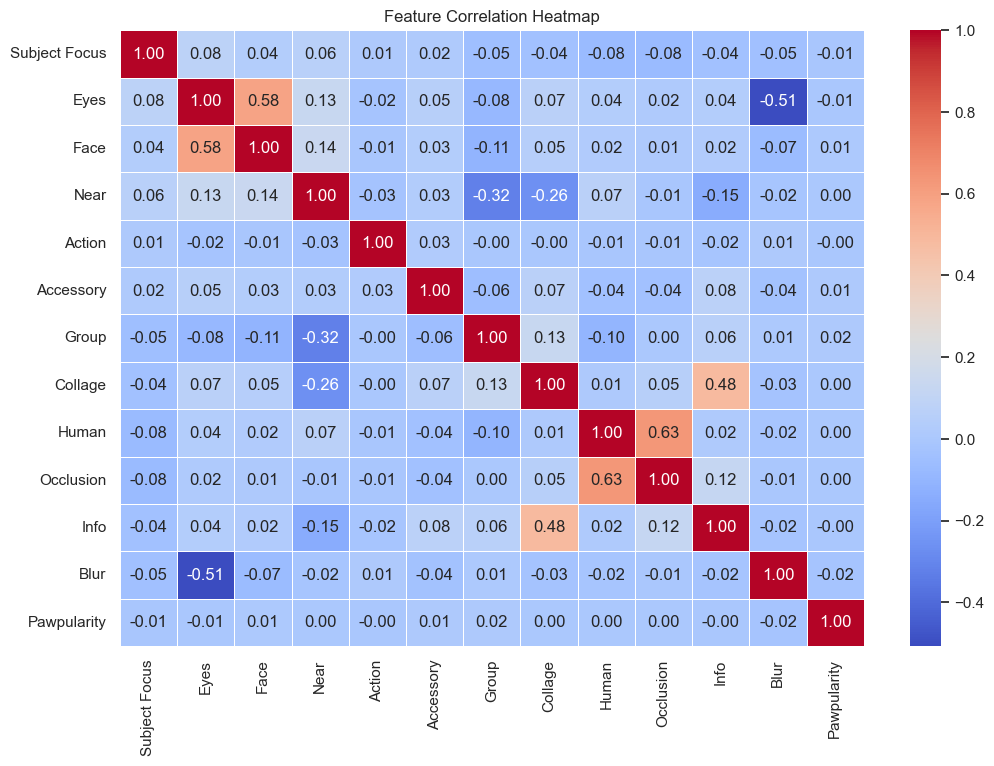

Top 5 High-Correlated Variables with Pawpularity
Group        0.016469
Accessory    0.013287
Face         0.008018
Human        0.003983
Occlusion    0.001979
Name: Pawpularity, dtype: float64


In [25]:
corr_matrix = df.drop(columns=['Id']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

if target_column in df.columns:
    corr_target = corr_matrix[target_column].drop(target_column).sort_values(ascending=False)
    print('Top 5 High-Correlated Variables with Pawpularity')
    print(corr_target.head(5))

    '''
    top_features = corr_target.head(5).index
    df_melted = df.melt(id_vars=[target_column], value_vars=top_features)

    plt.figure(figsize = (12, 6))
    sns.boxplot(x ='variable', y =target_column, data=df_melted, palette='coolwarm')
    plt.title('Pawpularity Score vs. High Correlated Features')
    plt.xlabel('Feature')
    plt.ylabel('Pawpularity Score')
    plt.show()
    '''

# Linear Regression

In [35]:
df.head()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0,1,1,1,0,0,0,0,0,0,0,0,15
4,0,0,0,1,0,0,1,0,0,0,0,0,72


In [39]:
import statsmodels.api as sm

target_column = "Pawpularity"
X = df.drop(columns=[target_column])
y = df[target_column]
X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Pawpularity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.992
Date:                Mon, 10 Feb 2025   Prob (F-statistic):             0.0211
Time:                        12:11:24   Log-Likelihood:                -44035.
No. Observations:                9912   AIC:                         8.810e+04
Df Residuals:                    9899   BIC:                         8.819e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            37.3704      0.872     42.846

 Mean Squared Error(MSE): 441.0863
 R² Score: 0.0021
Top Features that is one of most impactful to Pawpularity scores
     Feature  Coefficient
2       Face     2.542166
5  Accessory     1.610812
6      Group     1.364149
7    Collage     0.611345
3       Near     0.575257


/var/folders/4z/mczsf4vs4wsgt6fj97fl9lxw0000gn/T/ipykernel_62918/1729088381.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')


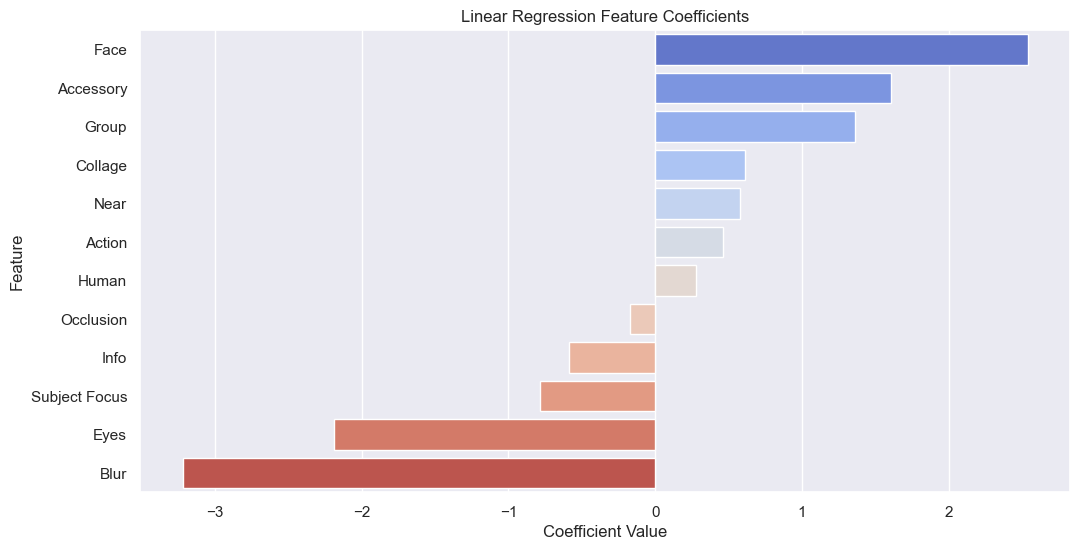

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

target_column = 'Pawpularity'
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Mean Squared Error(MSE): {mse:.4f}")
print(f" R² Score: {r2:.4f}")

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print('Top Features that is one of most impactful to Pawpularity scores')
print(coefficients.head(5))

plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
plt.title("Linear Regression Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.4f}")
print(f"Random Forest - R² Score: {r2_rf:.4f}")

Random Forest - MSE: 449.3249
Random Forest - R² Score: -0.0165


In [43]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb:.4f}")
print(f"XGBoost - R² Score: {r2_xgb:.4f}")

XGBoost - MSE: 446.2809
XGBoost - R² Score: -0.0096
